# Face Alignment Experiment

Experiment on face alignment to aligned face and use the degree as the measurement of face keyframe extraction

## Import Package

In [1]:
from scipy.spatial.distance import euclidean
from sklearn.metrics import accuracy_score, f1_score
from keras import backend as K
from feature_extractor.face_feature_extractor import FaceFeatureExtractor
import numpy as np
import cv2 as cv
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
import dlib
import os

/home/agusgun/anaconda3/envs/basic/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Read Dataset

In [2]:
DIR_PATH = '../lfw/'
image_path_list = []
labels = []
name_dictionary = {}
counter = 0
for root, dirs, files in os.walk(DIR_PATH):
    for filename in files:
        person_name = ' '.join(filename.split('.')[0].split('_')[0:-1]) 
        file_path = os.path.join(root, filename)
        if person_name not in name_dictionary:
            counter += 1
            name_dictionary[person_name] = counter
        image_path_list.append(file_path)
        labels.append(name_dictionary[person_name])

## Face Detection

In [3]:
mtcnn_detector = MTCNN()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [4]:
def normalize_keypoints(point, x, y):
    return (point[0] - x, point[1] - y)

Checkpoint 0


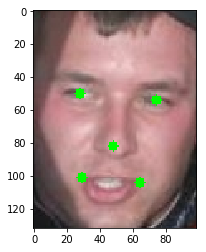

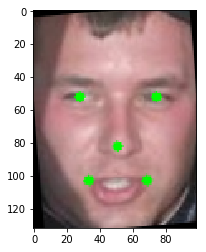

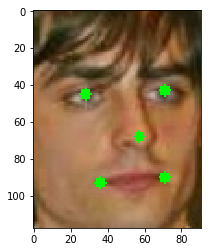

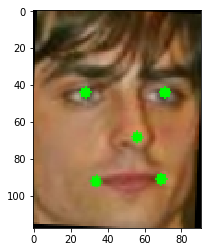

In [13]:
for idx, image_path in enumerate(image_path_list[0:2]):
    if idx % 1000 == 0:
        print("Checkpoint", idx)
    img = cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2RGB)
    height, width, channel = img.shape
    
    detection_result = mtcnn_detector.detect_faces(img)
    cropped_image = None
    for face in detection_result:
        face_bbox = face['box']
        x, y, w, h = face_bbox
        if x < 0:
            x = 0
        if y < 0:
            y = 0
        cropped_image = img[y:y+h, x:x+w]
        
        keypoints = face['keypoints']
        # Normalize position
        le_pos = normalize_keypoints(keypoints['left_eye'], x, y) 
        re_pos =  normalize_keypoints(keypoints['right_eye'], x, y)
        nose_pos =  normalize_keypoints(keypoints['nose'], x, y)
        ml_pos =  normalize_keypoints(keypoints['mouth_left'], x, y)
        mr_pos =  normalize_keypoints(keypoints['mouth_right'], x, y)
        
        break
    cv.circle(cropped_image, le_pos, 3, (0, 255, 0), -1)
    cv.circle(cropped_image, re_pos, 3, (0, 255, 0), -1)
    cv.circle(cropped_image, nose_pos, 3, (0, 255, 0), -1)
    cv.circle(cropped_image, ml_pos, 3, (0, 255, 0), -1)
    cv.circle(cropped_image, mr_pos, 3, (0, 255, 0), -1)
    
    plt.imshow(cropped_image)
    plt.show()
    
    dX = re_pos[0] - le_pos[0]
    dY = re_pos[1] - le_pos[1]
    angle = np.degrees(np.arctan2(dY, dX))
    
    # Aligned face
    scale = 1
    eyes_center = ((le_pos[0] + re_pos[0]) // 2, (le_pos[1] + re_pos[1]) // 2)
    M = cv.getRotationMatrix2D(eyes_center, angle, scale)
    output = cv.warpAffine(cropped_image, M, (w, h), cv.INTER_CUBIC)
    plt.imshow(output)
    plt.show()